# ARIM情報活用講座：　ケモインフォマテックス 編　
# 第2回：　RDKitの実践的な使い方

## 底本
* 船津 公人、柴山 翔二郎 **『実践 マテリアルズインフォマティクス　Pythonによる材料設計のための機械学習』**、近代科学社、2020  
第一章　データに慣れよう

* andersle.noのブログ https://www.andersle.no/posts/2022/esol/esol.html。


## データセット
実践例として用いるdelaney-processed.csvは1128化合物の水溶解度についてのデータセットです。このデータセットは、Delaneyの論文『ESOL: Estimating Aqueous Solubility Directly from Molecular Structure』[1] で発表されたものに基づいており、ケモインフォマテックス分野では広く知られているデータセットです。

[1] John S. Delaney, "ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure", J. Chem. Inf. Comput. Sci. 44, 1000–1005 (2004) (DOI: 10.1021/ci034243x)  

Delaney-processed.csvは、分子の化学式、SMILES表記、また、水溶解度としてオクタノール水分配係数が含まれており、これらの特性は薬物探索や環境影響評価などの目的で使用されています。


1. Compound ID	：化合物ID
1. ESOL predicted log solubility in mols per litre　：log水溶解度（オクタノール水分配係数）の予測値	
1. Minimum Degree：　最小次数	
1. Molecular Weight：分子量	
1. Number of H-Bond Donors	：　水素結合に関与するDonor数
1. Number of Rings	：芳香環の数	
1. Number of Rotatable Bonds　：　回転可能結合数	
1. Polar Surface Area　：　極性表面積	
1. measured log solubility in mols per litre：log水溶解度の実測値	
1. smiles：SMILES表記


## 本演習で用いるpythonライブラリ


**NumPy**：　高性能の数値計算やデータ処理に特化したPythonのライブラリです。NumPyは多次元の配列や行列を効率的に操作する機能を提供し、科学技術計算やデータ解析の分野で広く使用されています。

**Pandas**：　データ操作と解析のための高レベルのPythonライブラリです。Pandasは、テーブル形式のデータを効率的に処理し、データのフィルタリング、変換、集約、および結合などの機能を提供します。データの整形やクリーニング、欠損値の処理などを容易に行うことができます。

**Matplotlib**：　Pythonでデータを可視化するための強力なライブラリです。Matplotlibは、グラフや図を描画するための多様な機能を提供し、折れ線グラフ、ヒストグラム、散布図、バーチャートなどの多くのプロットスタイルをサポートしています。データの傾向や関係性を視覚的に理解するための強力なツールです。

**RDKit**：　RDKitは、化学情報学や薬学の分野で広く使用されるオープンソースのソフトウェア開発キットです。RDKitはPythonで実装されており、様々な化学情報の処理や分子の構造解析、化学反応の予測などをサポートします。

## 目標
delaney-processed.csv（csvファイル）を読み込み、RDKitを使ってデータの概要を把握する一般的な手順を学びます。

# Google Colabにおける環境設定
google colab環境でなければ実行不要

In [ ]:
!pip install rdkit-pypi
!git clone https://github.com/ARIM-Training/Training_python_4.git
%cd Training_python_4

## 1.分子構造データの読み込み　（P.11）

### 汎用ライブラリのインポート

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

from warnings import filterwarnings
filterwarnings('ignore')# 警告を無視

### サンプルファイルの読み込み
ここでは「data/delaney-solubility」フォルダーにあるdelaney-processed.csvをpandasの`read_csv()`からデータフレーム（DataFrame）オブジェクトとして変数dfに格納します。dfは1128化合物に対して10の特徴量からなるデータ行列となっていることが確かめられます。

In [2]:
df = pd.read_csv('./data/delaney-solubility/delaney-processed.csv')
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


特に着目する特徴量はlog水溶解度の予測値（ESOL predicted log solubility in mols per litre）と実験値（measured log solubility in mols per litre）との相関となります。  
ここでは相関図とヒストグラムの二通りの可視化方法で出力をしてみましょう。

### 相関図
下記の可視化図はandersle.noのブログにある https://www.andersle.no/posts/2022/esol/esol.html　を参照しています。

In [3]:
from sklearn.metrics import r2_score, mean_absolute_error

In [4]:
def add_scatterplot(ax, measured, predicted, model_name=None):
    """Add a measured vs. predicted scatter plot."""
    
    rsquared = r2_score(measured, predicted)
    mae = mean_absolute_error(measured, predicted)
    
    label = f"R²: {rsquared:.2f}\nMAE = {mae:.2f}"
    
    if model_name:
        label = f"{model_name}\n{label}"
    
    ax.scatter(measured,predicted,label=label,alpha=0.8)

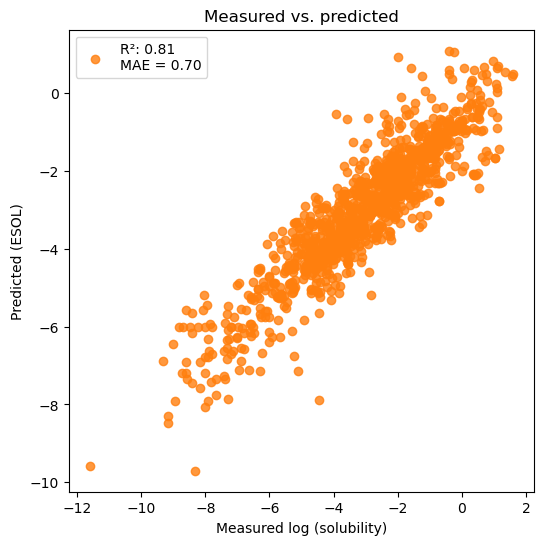

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter([], [])  # cycle colors

measured = df['measured log solubility in mols per litre']
esol = df['ESOL predicted log solubility in mols per litre']

add_scatterplot(ax, measured, esol)

ax.set(
    xlabel="Measured log (solubility)",
    ylabel="Predicted (ESOL)",
    title="Measured vs. predicted",
)

ax.legend()
plt.show()

### ヒストグラム

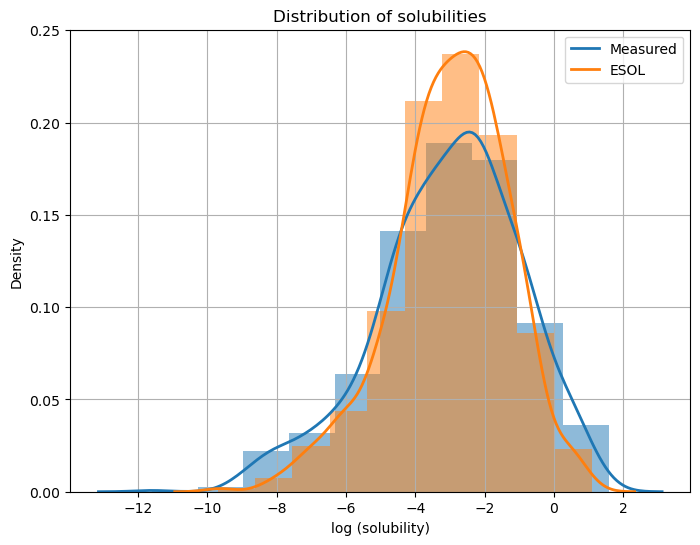

In [6]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))

# 実験値と予測値のヒストグラム
_, _, hist1 = ax.hist(df['measured log solubility in mols per litre'], density=True, alpha=0.5)
_, _, hist2 = ax.hist(df['ESOL predicted log solubility in mols per litre'], density=True, alpha=0.5)

# 実験値と予測値のkdeプロット
sns.kdeplot(
    data=df,
    x=df['measured log solubility in mols per litre'],
    ax=ax,
    label="Measured",
    color=hist1.patches[0].get_facecolor(),
    lw=2,
)

sns.kdeplot(
    data=df,
    x=df['ESOL predicted log solubility in mols per litre'],
    ax=ax,
    label="ESOL",
    color=hist2.patches[0].get_facecolor(),
    lw=2,
)

ax.legend()
ax.set(xlabel="log (solubility)", title="Distribution of solubilities")

ax.grid()
plt.show()

### RDKitによる化合物の可視化
10列目の「smile」にある文字列は分子構造をテキストベースで表現するSMILESです。第一回で学んだRDKitライブラリを使って機械可読させることができます。ここでは一列目のAmigdalinを`MolFromSmiles`メソッドから可視化してみましょう。

まず、dfオブジェクトの`'smiles'`列を確認します。

In [7]:
df['smiles']

0       OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1                                  Cc1occc1C(=O)Nc2ccccc2
2                                    CC(C)=CCCC(C)=CC(=O)
3                      c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4                                                 c1ccsc1
                              ...                        
1123                                     FC(F)(F)C(Cl)Br 
1124                            CNC(=O)ON=C(SC)C(=O)N(C)C
1125                                    CCSCCSP(=S)(OC)OC
1126                                              CCC(C)C
1127                COP(=O)(OC)OC(=CCl)c1cc(Cl)c(Cl)cc1Cl
Name: smiles, Length: 1128, dtype: object

一列目のAmigdalinのSMILESは、次のように0行目のスライスを指定して読み出すことができます。

In [8]:
df['smiles'][0]

'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

`MolFromSmiles()`メソッドからmolオブジェクト化して可視化してみましょう。

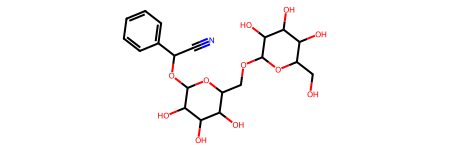

In [9]:
Amigdalin =  Chem.MolFromSmiles(df['smiles'][0])
Amigdalin

### 複数化合物のmolオブジェクト化
1128化合物のSMILE構造からMolオブジェクトを作成します。  
ここでは、mol ['smiles']列に`MolFromSmiles()`メソッドを適用して新しく生成したmolオブジェクトを['mol']のデータフレームとして追加しますが、apply関数（解説を参照）を利用すると、次の一行で処理を行うことができます。
['mol']のデータフレームが一番最後の列に追加されたことを確認してみましょう。

In [14]:
df['mol']=df['smiles'].apply(Chem.MolFromSmiles)
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,mol
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,<rdkit.Chem.rdchem.Mol object at 0x000001FB968...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x000001FB968...
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O),<rdkit.Chem.rdchem.Mol object at 0x000001FB967...
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,<rdkit.Chem.rdchem.Mol object at 0x000001FB967...
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1,<rdkit.Chem.rdchem.Mol object at 0x000001FB967...
...,...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br,<rdkit.Chem.rdchem.Mol object at 0x000001FB968...
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,<rdkit.Chem.rdchem.Mol object at 0x000001FB968...
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC,<rdkit.Chem.rdchem.Mol object at 0x000001FB968...
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C,<rdkit.Chem.rdchem.Mol object at 0x000001FB968...


【解説】 **`apply()`** 関数について    
`apply`関数はPandasライブラリに含まれており、DataFrameオブジェクトに対して特定の関数を適用するために使用されます。`apply`関数は、各行または列に対して関数を適用し、その結果を新しいDataFrameまたはSeriesとして返します。

以下に、`apply`関数の基本的な使についてつか説明します。

1. 列ごとに関数を適用する場合:

```python
import pandas as pd

# サンプルのDataFrameを作成
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# 列ごとに関数を適用して新しい列を作成
def square(x):
    return x**2

df['A_squared'] = df['A'].apply(square)
```

上記のコードでは、`square`関数を使って'A'列の各要素を2乗し、新しい'A_squared'列にその結果を保存します。

2. 行ごとに関数を適用する場合:

```python
import pandas as pd

# サンプルのDataFrameを作成
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# 行ごとに関数を適用して新しい列を作成
def sum_of_row(row):
    return row['A'] + row['B']

df['Sum'] = df.apply(sum_of_row, axis=1)
```

上記のコードでは、`sum_of_row`関数を使って各行の'A'列と'B'列の要素を合計し、新しい'Sum'列にその結果ます。データの変換や計算を行う際に、`apply`関数は非常に便利なツールです。

### 複数の分子を表示
こちらも第一回で学んだ`MolsToGridImage()`メソッドを使った表示例です。molsPerRow=3として横に三つの分子を配置します。

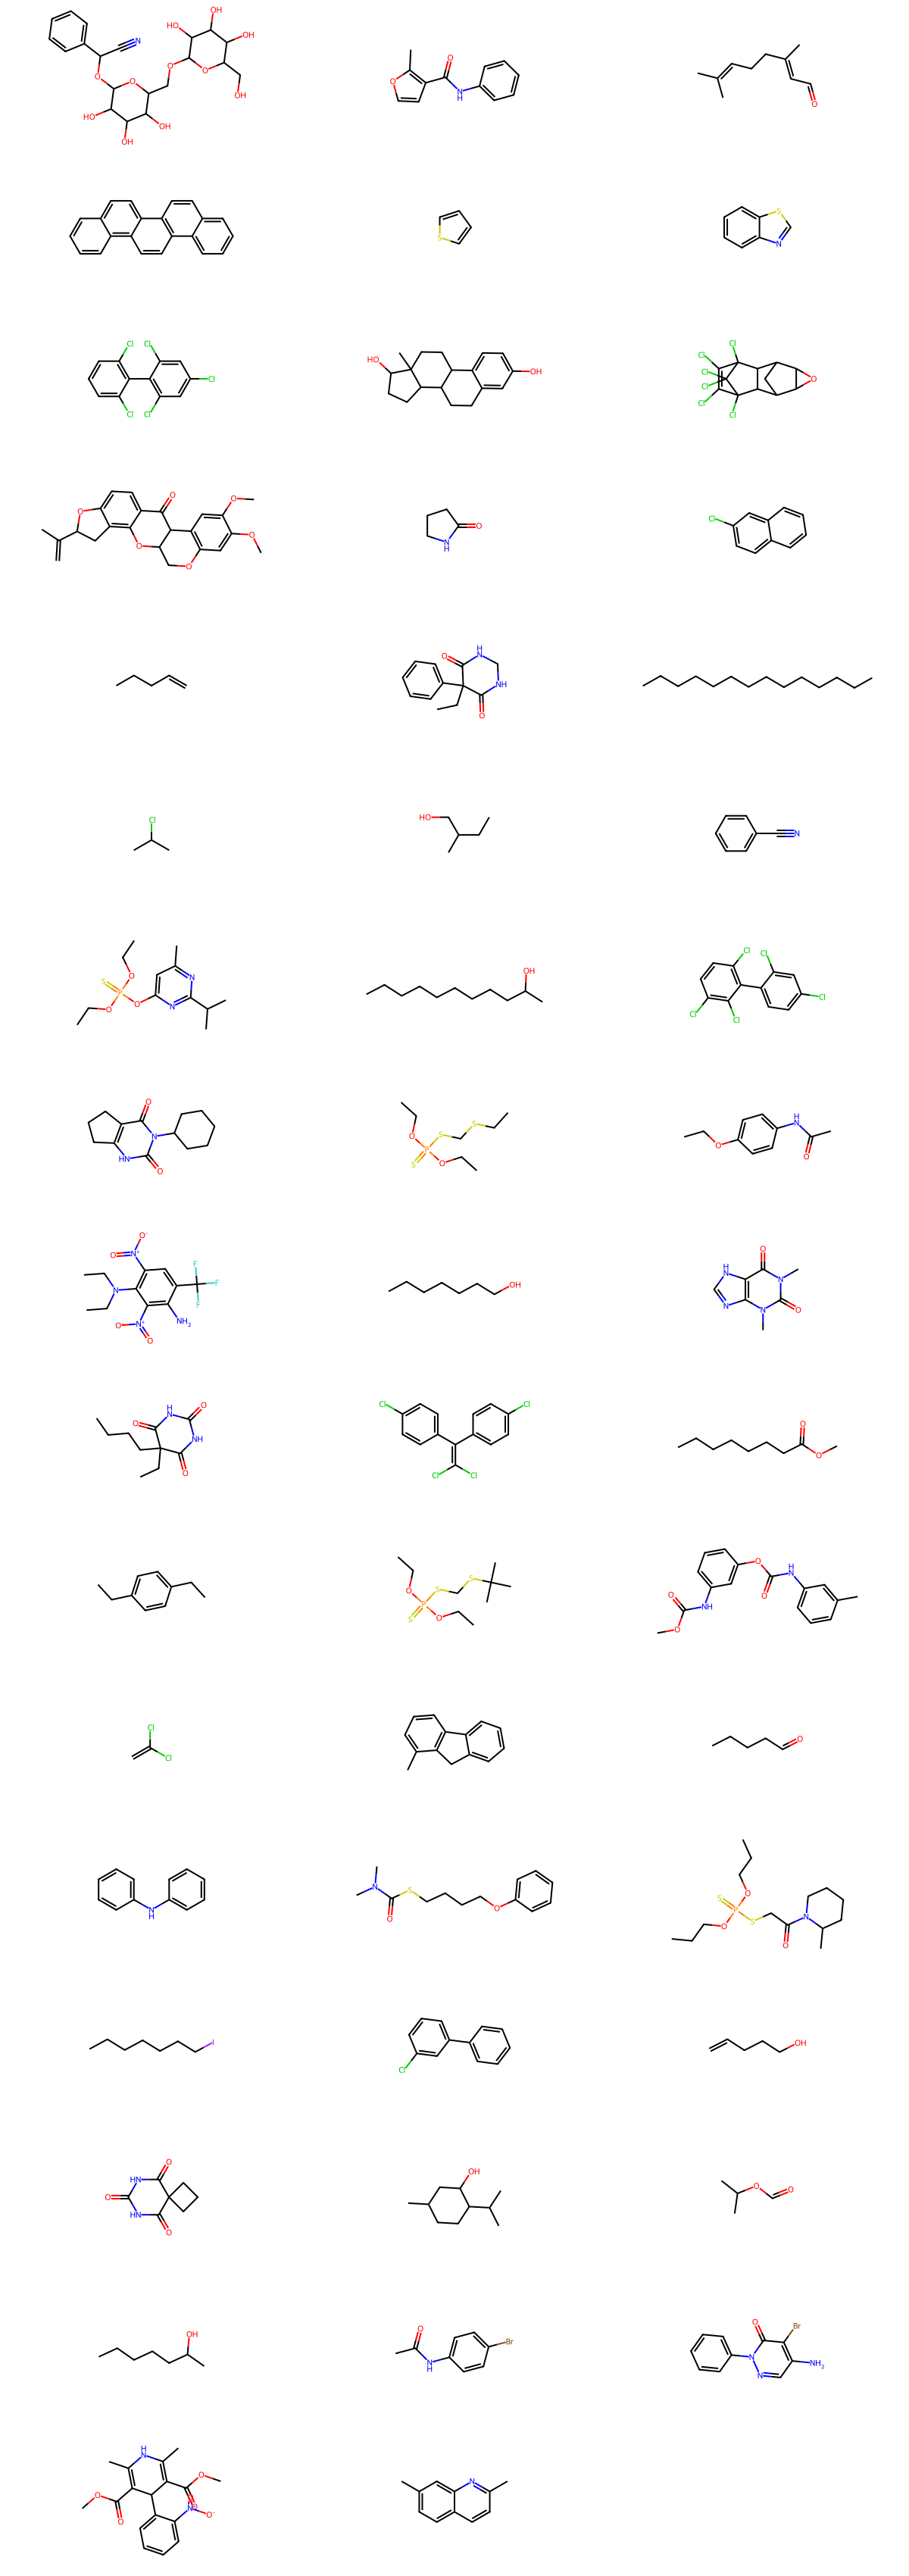

In [15]:
mols = [Chem.MolFromSmiles(smi) for smi in df['smiles']]
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(400, 200))

molオブジェクトはデータフレーム形式のルールに従った行番号を指定して次のようにして分子構造を表示させることができます。

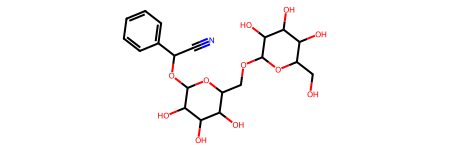

In [16]:
# 最初のCompound ID =Amigdalin のアミグダリンについて化合物を表示
df['mol'][0]

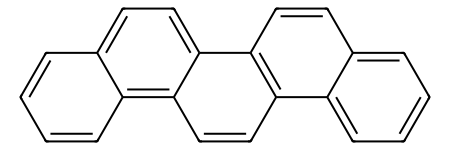

In [17]:
# 4つ目のピセンについて化合物を表示
df['mol'][3]

### PandasToolsモジュールを使ったサンプルの確認



`PandasTools`モジュールは、RDKitのの機能一あPandasデータフレームとRDKitの分子オブジェクトを相互に変換したり、データフレーム内の分子データを簡単に処理したりすることができます。以下に、`PandasTools`モジュールの主な機能といくつかの使用例を示します。

1. **分子オブジェクトとデータフレームの変換**:

   `PandasTools`モジュールを使用して、RDKitの分子オブジェクトとPandasデータフレームの間でデータを簡単に変換できます。例えば、化合物のSMILES表現からPandasデータフレームに変換することができます。

   ```python
   from rdkit import Chem
   from rdkit.Chem import PandasTools

   smiles = ['CCO', 'CCN', 'C=O']
   mols = [Chem.MolFromSmiles(smi) for smi in smiles]

   df = PandasTools.LoadSDF('compounds.sdf')  # SDFファイルから読み込む
   df['Molecule'] = mols  # 分子オブジェクトをデータフレームに追加
   ```

2. **分子の記述子計算（第三回）**:

   データフレーム内の分子に対してさまざまな分子記述子（例: 質量、ロタボンド数、水素結合ドナー数など）を計算できます。

   ```python
   from rdkit.Chem import Descriptors

   df['MolecularWeight'] = df['Molecule'].apply(Descriptors.MolWt)
   ```

3. **分子間の類似性評価（第四回）**:

   データフレーム内の分子の類似性を計算することができます。類似性は、指定した類似性スコア（例: Tanimoto係数）を計算する関数を使用して行われます。

   ```python
   from rdkit.Chem import AllChem

   df['Similarity'] = df['Molecule'].apply(lambda x: AllChem.TanimotoSimilarity(x, reference_molecule))
   ```

4. **フィルタリング**:

   データフレーム内の分子を特定の条件に基づいてフィルタリングできます。

   ```python
   filteredint(df)
    ```

この例では、分子のSMILES表現を含むPandasデータフレームに、RDKitのMolオブジェクトを表す新しい列を追加しています。データフレームにMolオブジェクトの列が追加され、RDKitの機能を利用して分子の操作や特徴量の計算が行えるようになります。

In [18]:
from rdkit.Chem import PandasTools

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,mol,ROMol
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,,
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2,,
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O),,
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,,
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1,,
...,...,...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br,,
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,,
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC,,
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C,,

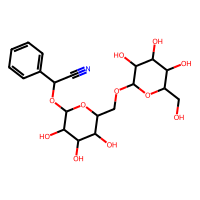
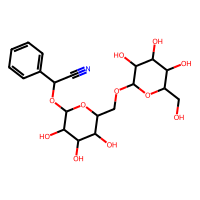
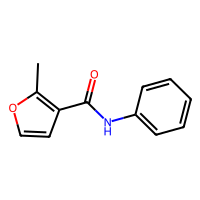
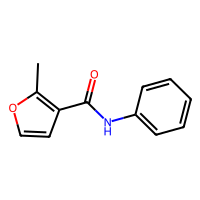
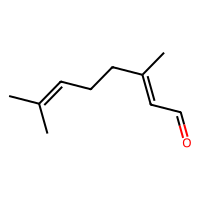
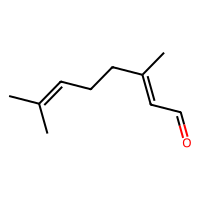
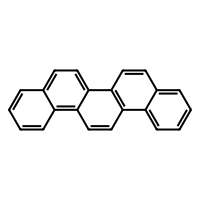
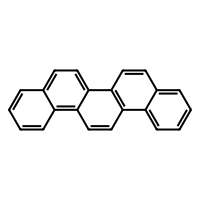
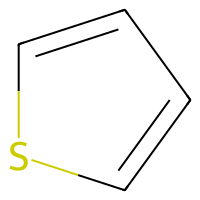
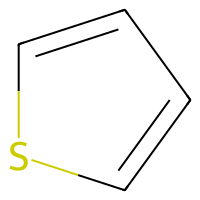
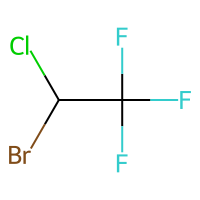
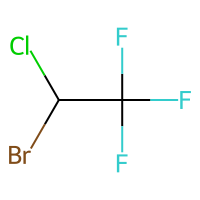
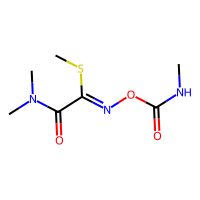
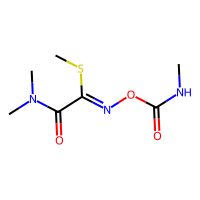
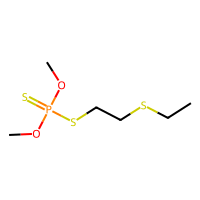
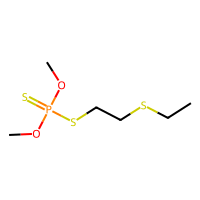
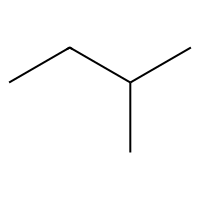
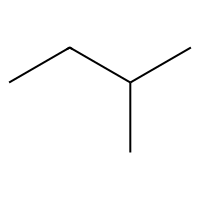
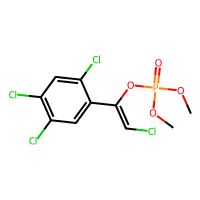
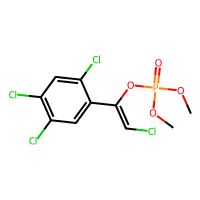

In [19]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')
df

【解説】`PandasTool`の主なメソッド  

1. `AddMoleculeColumnToFrame`: 分子のSMILES表現を含むPandasデータフレームに、RDKitのMolオブジェクトを表す新しい列を追加します。

2. `RemoveMoleculeColumnFromFrame`: RDKitのMolオブジェクトを表す列をPandasデータフレームから削除します。

3. `ConvertToMoleculeColumn`: 分子のSMILES列をRDKitのMolオブジェクトを表す列に変換します。

4. `PandasTools.RenderImagesInAllDataFrames`: 分子の画像をPandasデータフレームに表示します。

以下は、`PandasTools`を使った例です：

```python
from rdkit import Chem
from rdkit.Chem import PandasTools
import pandas as pd

# データフレームを作成
data = {'SMILES': ['CCO', 'CN=C=O', 'CCN(CC)C(=O)OC1=CC=CC=C1C(=O)O']}
df = pd.DataFrame(data)

# SMILES列からMolオブジェクトの列を追加
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='SMILES')

# データフレームを表示
print(df)
```

この例では、分子のSMILES表現を含むPandasデータフレームに、RDKitのMolオブジェクトを表す新しい列を追加しています。データフレームにMolオブジェクトの列が追加され、RDKitの機能を利用して分子の操作や特徴量の計算が行えるようになります。

### PandasToolsによる分子構造と変数の表示例

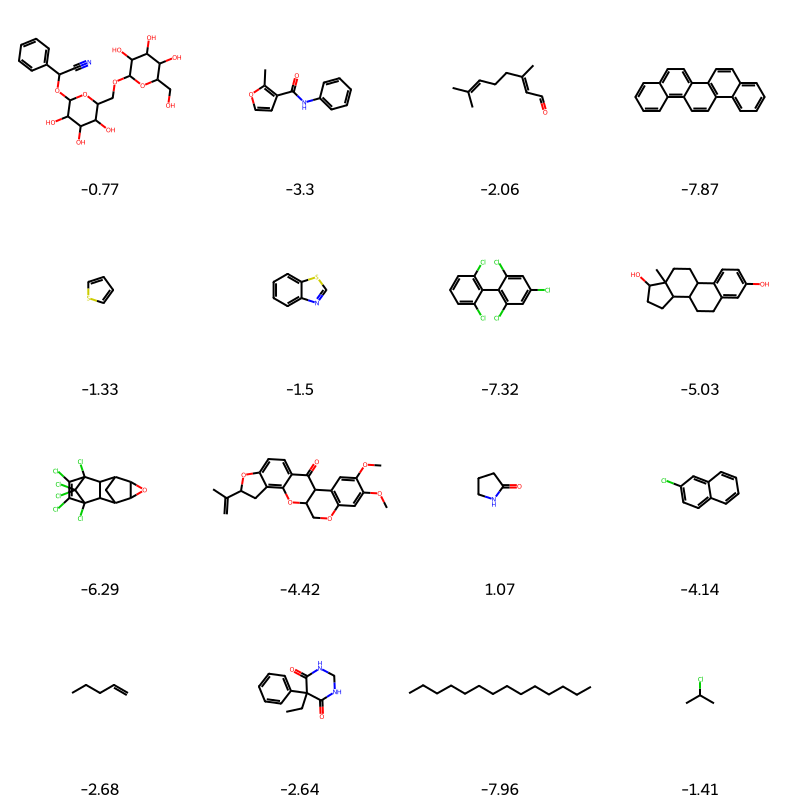

In [20]:
PandasTools.FrameToGridImage(df.head(16), 
                             legendsCol="measured log solubility in mols per litre", 
                             molsPerRow=4)

【解説】 **`FrameToGridImage()`** メソッド  
RDKitを使用して作成した分子データのグリッド画像を生成するための関数です。このメソッドは、分子データを含むPandasデータフレームを受け取り、その分子を格子状に配置して画像として出力します。これは、化学データを視覚化するためによく使用されます。

以下に、`FrameToGridImage()`メソッドの基本的な使い方と例を示します。

```python
from rdkit import Chem
from rdkit.Chem import PandasTools
from IPython.display import Image

# サンプルのデータフレームを作成
data = {'ID': [1, 2, 3],
        'SMILES': ['CCO', 'CCN', 'C=O']}
df = pd.DataFrame(data)

# SMILESからRDKitの分子オブジェクトを作成し、データフレームに追加
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='SMILES')

# 分子データフレームをグリッド画像に変換
img = PandasTools.FrameToGridImage(df, legendsCol='ID', molsPerRow=3)

# 画像を表示
Image(img)
```

このコードでは、まず`PandasTools.AddMoleculeColumnToFrame`を使用して、'SMILES'列からRDKitの分子オブジェクトを作成し、'Molecule'列に追加しています。次に、`PandasTools.FrameToGridImage`メソッドを使用して、分子データフレームをグリッド画像に変換します。`legendsCol`引数には分子のラベルとして使用する列（ここでは'ID'列）を指定し、`molsPerRow`引数には1行に表示する分子の数を指定しています。

生成されたグリッド画像は、Jupyter Notebookなどの環境で直接表示することができます。これにより、化学構造を視覚的に比較したりDKitを使用した化学データの解析と可視化を支援します。

# 次回  
https://colab.research.google.com/github/ARIM-Training/Training_python_4/blob/main/3_Descriptor.ipynb